In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!kaggle datasets download vbookshelf/v2-plant-seedlings-dataset

Dataset URL: https://www.kaggle.com/datasets/vbookshelf/v2-plant-seedlings-dataset
License(s): CC-BY-SA-4.0
v2-plant-seedlings-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile('v2-plant-seedlings-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('plant_seedlings')

In [ ]:
# data_dir = 'plant_seedlings'

# train_ds = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     image_size=(224, 224),
#     batch_size=32
# )

# class_names=train_ds.class_names
# print('Classes:',class_names)

In [ ]:
!ls plant_seedlings

 Black-grass  'Common Chickweed'  'Loose Silky-bent'  'Scentless Mayweed'	   'Sugar beet'
 Charlock     'Common wheat'	   Maize	      'ShepherdΓÇÖs Purse'
 Cleavers     'Fat Hen'		   nonsegmentedv2     'Small-flowered Cranesbill'


In [ ]:
!ls plant_seedlings/nonsegmentedv2/

 Black-grass  'Common Chickweed'  'Loose Silky-bent'   'ShepherdΓÇÖs Purse'
 Charlock     'Common wheat'	   Maize	       'Small-flowered Cranesbill'
 Cleavers     'Fat Hen'		  'Scentless Mayweed'  'Sugar beet'


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('plant_seedlings'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 13 directories and 0 images in plant_seedlings
There are 0 directories and 538 images in plant_seedlings/Fat Hen
There are 0 directories and 762 images in plant_seedlings/Loose Silky-bent
There are 0 directories and 607 images in plant_seedlings/Scentless Mayweed
There are 0 directories and 452 images in plant_seedlings/Charlock
There are 0 directories and 713 images in plant_seedlings/Common Chickweed
There are 0 directories and 576 images in plant_seedlings/Small-flowered Cranesbill
There are 0 directories and 274 images in plant_seedlings/ShepherdΓÇÖs Purse
There are 12 directories and 0 images in plant_seedlings/nonsegmentedv2
There are 0 directories and 538 images in plant_seedlings/nonsegmentedv2/Fat Hen
There are 0 directories and 762 images in plant_seedlings/nonsegmentedv2/Loose Silky-bent
There are 0 directories and 607 images in plant_seedlings/nonsegmentedv2/Scentless Mayweed
There are 0 directories and 452 images in plant_seedlings/nonsegmentedv2/Charlock
There a

In [ ]:
for i in os.walk('plant_seedlings/nonsegmentedv2'):
  print(i)

('plant_seedlings/nonsegmentedv2', ['Fat Hen', 'Loose Silky-bent', 'Scentless Mayweed', 'Charlock', 'Common Chickweed', 'Small-flowered Cranesbill', 'ShepherdΓÇÖs Purse', 'Cleavers', 'Black-grass', 'Common wheat', 'Maize', 'Sugar beet'], [])
('plant_seedlings/nonsegmentedv2/Fat Hen', [], ['467.png', '131.png', '363.png', '5.png', '319.png', '198.png', '501.png', '414.png', '162.png', '219.png', '44.png', '261.png', '444.png', '532.png', '311.png', '220.png', '221.png', '523.png', '7.png', '106.png', '124.png', '478.png', '395.png', '59.png', '230.png', '126.png', '320.png', '107.png', '518.png', '433.png', '366.png', '209.png', '522.png', '104.png', '492.png', '426.png', '428.png', '40.png', '297.png', '479.png', '229.png', '239.png', '235.png', '108.png', '213.png', '84.png', '445.png', '427.png', '392.png', '435.png', '109.png', '322.png', '174.png', '464.png', '486.png', '458.png', '136.png', '35.png', '132.png', '215.png', '382.png', '200.png', '461.png', '393.png', '69.png', '187.

In [ ]:
num_plant_images = len(os.listdir('plant_seedlings/Common Chickweed'))
num_plant_images

713

In [ ]:
os.listdir('plant_seedlings')

['Fat Hen',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Charlock',
 'Common Chickweed',
 'Small-flowered Cranesbill',
 'ShepherdΓÇÖs Purse',
 'nonsegmentedv2',
 'Cleavers',
 'Black-grass',
 'Common wheat',
 'Maize',
 'Sugar beet']

In [ ]:
import pathlib

data_dir = pathlib.Path('plant_seedlings/nonsegmentedv2')
data_dir

PosixPath('plant_seedlings/nonsegmentedv2')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'ShepherdΓÇÖs Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [ ]:
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape:',{img.shape})
  return img

Image shape: {(555, 555, 3)}


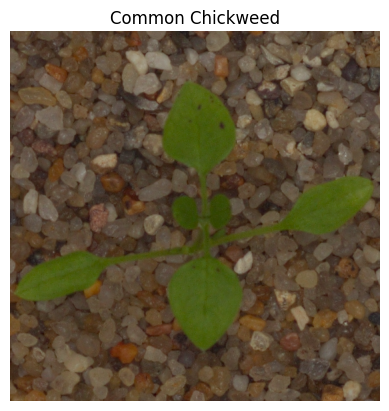

In [ ]:
img = view_random_image(target_dir='plant_seedlings/nonsegmentedv2/', target_class='Common Chickweed')

In [ ]:
img/255

array([[[0.00138408, 0.00110727, 0.00086121],
        [0.00153787, 0.00124567, 0.00098424],
        [0.00155325, 0.0012303 , 0.00092272],
        ...,
        [0.00169166, 0.00135333, 0.00103037],
        [0.00173779, 0.00139946, 0.00106113],
        [0.00189158, 0.00156863, 0.0012303 ]],

       [[0.00135333, 0.00106113, 0.00083045],
        [0.00150711, 0.00121492, 0.00095348],
        [0.0016609 , 0.0013687 , 0.00106113],
        ...,
        [0.00170704, 0.0013687 , 0.00101499],
        [0.00159938, 0.00124567, 0.00089196],
        [0.00175317, 0.00141484, 0.00106113]],

       [[0.00126105, 0.00095348, 0.0007228 ],
        [0.00149173, 0.00119954, 0.0009381 ],
        [0.0016609 , 0.00138408, 0.00107651],
        ...,
        [0.00178393, 0.0014456 , 0.00110727],
        [0.00175317, 0.00141484, 0.00106113],
        [0.00176855, 0.00143022, 0.00106113]],

       ...,

       [[0.00127643, 0.00081507, 0.00036909],
        [0.00133795, 0.00084583, 0.00027682],
        [0.00152249, 0

# Fitting the Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/plant_seedlings/nonsegmentedv2/'

In [ ]:
train_data = train_datagen.flow_from_directory(dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training',
                                               seed=42)

valid_data = train_datagen.flow_from_directory(dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='validation',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(100,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(100, 3, activation='relu'),
    tf.keras.layers.Conv2D(100, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(), # bütün şəkilləri vektor halına salır
    tf.keras.layers.Dense(12, activation='softmax')
])

Found 4437 images belonging to 12 classes.
Found 1102 images belonging to 12 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 83s 492ms/step - accuracy: 0.1642 - loss: 2.5520 - val_accuracy: 0.4465 - val_loss: 1.6321
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 50s 362ms/step - accuracy: 0.5505 - loss: 1.3306 - val_accuracy: 0.5608 - val_loss: 1.3465
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 47s 340ms/step - accuracy: 0.6675 - loss: 0.9852 - val_accuracy: 0.6098 - val_loss: 1.2218
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 45s 320ms/step - accuracy: 0.7430 - loss: 0.7647 - val_accuracy: 0.6016 - val_loss: 1.2840
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 85s 346ms/step - accuracy: 0.8437 - loss: 0.5031 - val_accuracy: 0.6334 - val_loss: 1.3563


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 100)       │           9,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 100)       │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 280900)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │       3,370,812 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,681,178 (40.75 MB)

 Trainable params: 3,560,392 (13.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,120,786 (27.16 MB)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 43s 295ms/step - accuracy: 0.1269 - loss: 3.9743 - val_accuracy: 0.1379 - val_loss: 2.4651
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 78s 277ms/step - accuracy: 0.1337 - loss: 2.4611 - val_accuracy: 0.1379 - val_loss: 2.4503
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 44s 303ms/step - accuracy: 0.1381 - loss: 2.4474 - val_accuracy: 0.1379 - val_loss: 2.4395
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 38s 277ms/step - accuracy: 0.1393 - loss: 2.4405 - val_accuracy: 0.1379 - val_loss: 2.4319
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.1432 - loss: 2.4316 - val_accuracy: 0.1379 - val_loss: 2.4266


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,590 (6.89 MB)

 Trainable params: 602,196 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,394 (4.59 MB)

In [ ]:
len(train_data)

139

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/plant_seedlings/nonsegmentedv2/'

In [ ]:
train_data = train_datagen.flow_from_directory(directory=dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               subset='training')

test_data = test_datagen.flow_from_directory(directory=dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               shuffle=False)

Found 4437 images belonging to 12 classes.
Found 5539 images belonging to 12 classes.


In [ ]:
images, labels = next(train_data)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPool2D
from tensorflow.keras import Sequential

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model_3 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(12, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer=Adam(learning_rate=1e-3)
model_3.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 47s 311ms/step - accuracy: 0.1362 - loss: 2.4353 - val_accuracy: 0.2931 - val_loss: 2.0440
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 40s 286ms/step - accuracy: 0.3356 - loss: 1.8644 - val_accuracy: 0.3857 - val_loss: 1.7112
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 42s 288ms/step - accuracy: 0.4450 - loss: 1.5685 - val_accuracy: 0.4392 - val_loss: 1.5498
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 43s 303ms/step - accuracy: 0.4972 - loss: 1.4204 - val_accuracy: 0.5064 - val_loss: 1.4240
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 79s 282ms/step - accuracy: 0.5350 - loss: 1.3124 - val_accuracy: 0.5245 - val_loss: 1.3658


In [ ]:
model_1.evaluate(test_data)

174/174 ━━━━━━━━━━━━━━━━━━━━ 43s 244ms/step - accuracy: 0.8320 - loss: 0.5349


[0.539155900478363, 0.8523198962211609]

In [ ]:
model_3.evaluate(test_data)

174/174 ━━━━━━━━━━━━━━━━━━━━ 39s 225ms/step - accuracy: 0.4476 - loss: 1.3262


[1.2663371562957764, 0.5520852208137512]

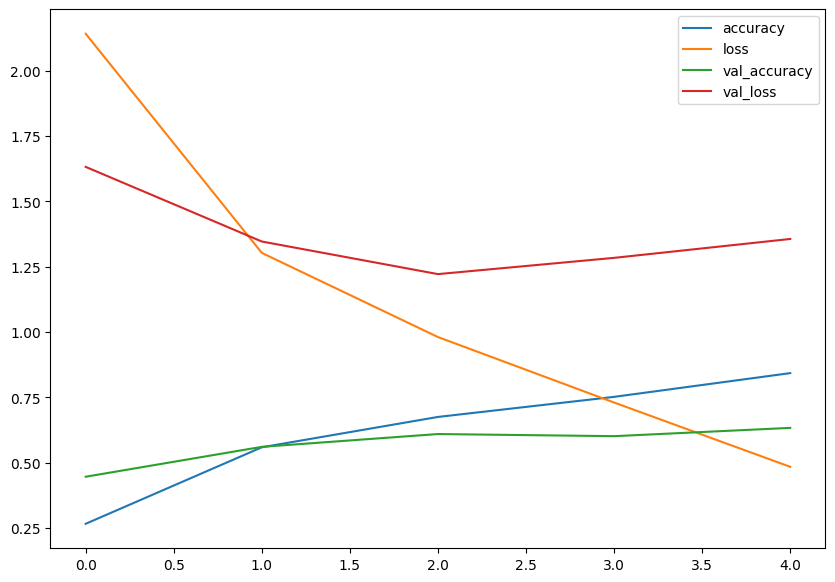

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [ ]:
history_3.history

{'accuracy': [0.19134549796581268,
  0.3655623197555542,
  0.4545864462852478,
  0.5016903281211853,
  0.5400044918060303],
 'loss': [2.3460137844085693,
  1.769353985786438,
  1.5278844833374023,
  1.4190765619277954,
  1.3059083223342896],
 'val_accuracy': [0.2931034564971924,
  0.3856624364852905,
  0.4392014443874359,
  0.5063520669937134,
  0.5245009064674377],
 'val_loss': [2.0439889430999756,
  1.7111902236938477,
  1.5497726202011108,
  1.4240473508834839,
  1.3657766580581665]}

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history_1.history['val_loss']
  accuracy = history_1.history['accuracy']
  val_accuracy = history_1.history['val_accuracy']
  epochs=range(len(history_1.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

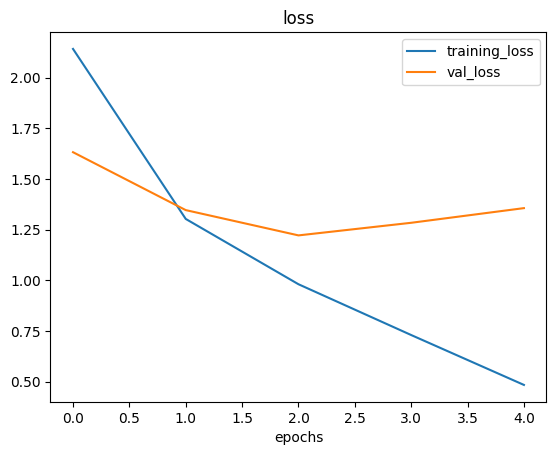

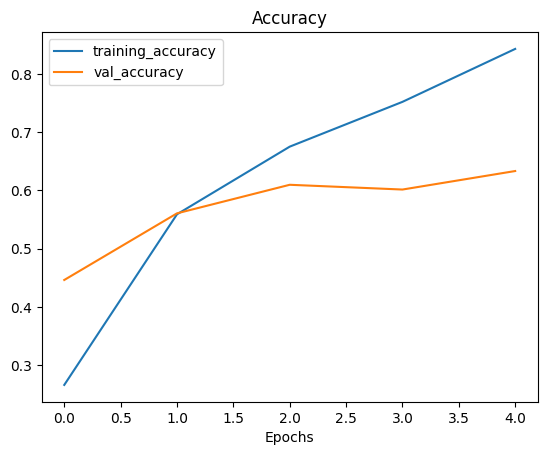

In [ ]:
import matplotlib.pyplot as plt

plot_loss_curves(history_1)